In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [2]:
departamentos = ["la_paz","cochabamba","santa_cruz","oruro","potosi","tarija","chuquisaca","beni","pando"]

for i in range(9):
    departamentos[i] = pd.read_csv("https://raw.githubusercontent.com/mauforonda/covid19bolivia-municipal/master/{}.csv".format(departamentos[i]))

df = pd.concat(departamentos[0:9])


In [3]:
df.groupby("municipio").sum()

,cod_ine,confirmados
municipio,,
Acasio,1333852,57
Achacachi,2121105,195
Achocalla,2452688,469
Aiquile,5466381,532
Alalay,31303,1
...,...,...
Yocalla,1954017,94
Yotala,1232444,361
Yunchará,4228140,148


In [4]:
sdsn = pd.read_csv("https://github.com/mauforonda/covidenbolivia/raw/master/scripts/municipios_heatmap/sdsn.gen.csv")
sdsn

,cod_ine,municipio,departamento,sdi,poblacion,urbanizacion
0,10101,Sucre,Chuquisaca,69.582053,295476,91.4
1,10102,Yotala,Chuquisaca,55.501551,10017,0.0
2,10103,Poroma,Chuquisaca,35.662371,18947,0.0
3,10201,Azurduy,Chuquisaca,37.926692,10948,0.0
4,10202,Tarvita,Chuquisaca,39.974894,14688,0.0
...,...,...,...,...,...,...
334,90401,Santa Rosa,Pando,48.207247,2506,0.0
335,90402,Ingavi,Pando,43.623216,1840,0.0
336,90501,Nueva Esperanza,Pando,46.017078,2422,0.0
337,90502,Villa Nueva-Loma Alta,Pando,43.039756,3209,0.0


In [5]:
df_merge = pd.merge(df, sdsn, on="cod_ine")

df_merge = df_merge[df_merge.municipio_x != "Colcha \"K\""]
df_merge = df_merge[df_merge.municipio_x != "Caiza \"D\""]
df_merge

,fecha,cod_ine,municipio_x,confirmados,municipio_y,departamento,sdi,poblacion,urbanizacion
0,2020-03-19,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
1,2020-03-24,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
2,2020-03-25,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
3,2020-03-26,20101,Nuestra Señora de La Paz,2,La Paz,La Paz,80.151007,816044,99.0
4,2020-03-28,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
...,...,...,...,...,...,...,...,...,...
30781,2021-04-02,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0
30782,2021-04-03,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0
30783,2021-04-23,90402,Ingavi,3,Ingavi,Pando,43.623216,1840,0.0
30784,2021-04-26,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0


In [6]:
df_merge.to_csv("casos_municipios_completo.csv")

In [7]:
# print(df_merge.cod_ine.value_counts())
# print(df_merge.municipio_y.value_counts())
# print(df_merge.municipio_x.value_counts())

mun_dict = dict(zip(df_merge.cod_ine, df_merge.municipio_x))
mun_dict

{20101: 'Nuestra Señora de La Paz',
 21701: 'Copacabana',
 20105: 'El Alto',
 21305: 'Patacamaya',
 20905: 'Cairoma',
 21202: 'Laja',
 20904: 'Malla',
 21101: 'Chulumani',
 21003: 'Cajuata',
 20201: 'Achacachi',
 20801: 'Viacha',
 21301: 'Sicasica',
 21302: 'Umala',
 22001: 'Caranavi',
 20104: 'Achocalla',
 21004: 'Colquiri',
 20602: 'Guanay',
 20608: 'Teoponte',
 21104: 'Palos Blancos',
 21402: 'Coripata',
 21105: 'La Asunta',
 21401: 'Coroico',
 20702: 'Pelechuco',
 21103: 'Yanacachi',
 20301: 'Corocoro',
 21502: 'San Buenaventura',
 20502: 'Ayata',
 21201: 'Pucarani',
 21203: 'Batallas',
 20601: 'Sorata',
 20607: 'Mapiri',
 20405: 'Escoma',
 20103: 'Mecapaca',
 20902: 'Sapahaqui',
 22002: 'Alto Beni',
 20203: 'Huarina',
 20501: 'Chuma',
 20802: 'Puerto Mayor de Guaqui',
 21102: 'Irupana',
 21304: 'Calamarca',
 20202: 'Villa Ancoraimes',
 20204: 'Santiago de Huata',
 20305: 'Charaña',
 20803: 'Tiahuanacu',
 21002: 'Quime',
 21001: 'Inquisivi',
 20606: 'Tipuani',
 20306: 'Waldo Balliv

In [8]:
list_municipio_x = df_merge.municipio_x.value_counts().index
list_municipio_x = list_municipio_x.str.replace(" ", "_")
# list_municipio_x = list_municipio_x.str.replace("\"", "")

for i in range(len(list_municipio_x)):
    df_alt = df_merge.set_index("cod_ine")
    df_alt = df_alt.loc[[list(mun_dict.keys())[i]]]
    # display(df_alt)
    df_alt.to_csv("casos_municipios/{}.csv".format(list(mun_dict.values())[i]))

# df_alt = df_merge.groupby(["municipio_x","fecha"]).head()
# df_alt = df_merge.set_index("fecha")
# df_alt

In [9]:
# total = 100
# nrows = 25
# ncols = 4


# fig, axs = plt.subplots(nrows, ncols, figsize = (20,50), sharex=False)
# axs = axs.flatten()

# fig.suptitle("Casos confirmados de COVID-19 por municipio boliviano", fontsize = 26, y = 1.02)
# fig.text(0.5,1.003,"Datos del Ministerio de Desarrollo Productivo y Economía Plural, vía @mauforonda",ha="center", fontsize = 14)

# for i in range(100):
#   #df_by_mun = pd.read_csv("{}.csv".format(list_municipio_x[i]))
#   df_by_mun = df_alt.groupby("municipio_x").get_group("{}".format(list_municipio_x[i]))
#   #x= df_by_mun.fecha.array
#   df_by_mun.index = pd.to_datetime(df_by_mun.index, format="%Y-%m-%d")
#   x= df_by_mun.index
#   y= df_by_mun.confirmados
#   #df_by_mun.set_index("fecha")

#   axs[i].bar(x,y, zorder=2, color="y")
#   axs[i].set_title("{} \n(última actualización: {})".format(list_municipio_x[i], 
#                    x[-1].date()))

#   #axs[i].plot(df_by_mun.confirmados.rolling(7).mean(), zorder=3, color="r")

#   axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

# fig.tight_layout()

In [10]:
# fig.savefig("confirmados_municipal.jpg", bbox_inches="tight")

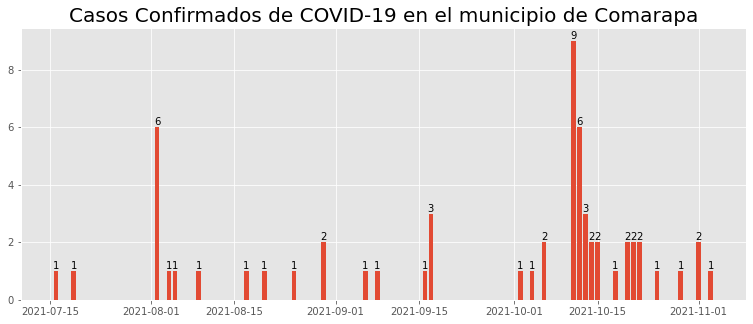

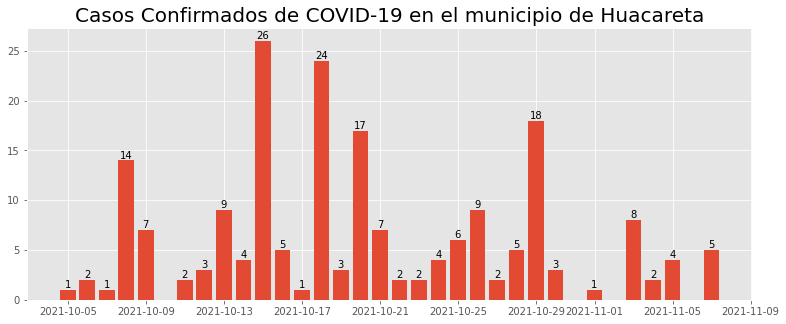

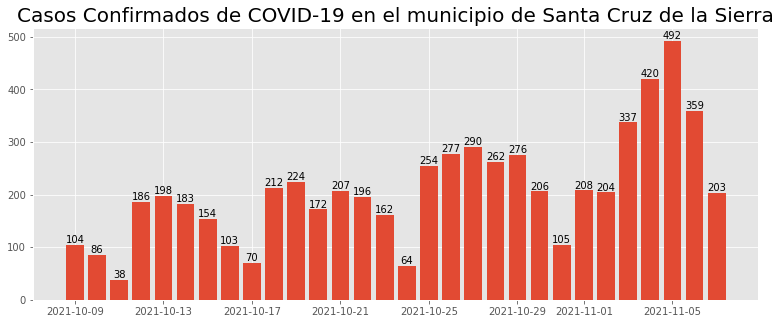

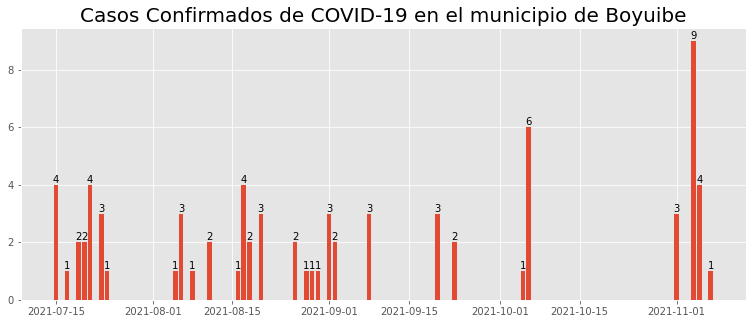

In [11]:
plt.style.use("ggplot")
def plot_mun(municipio_y, days_ago):
    df_mun = df_merge[df_merge.municipio_y==municipio_y].set_index("fecha")
    # display(df_mun.tail(days_ago))
    df_mun.index = pd.to_datetime(df_mun.index).date
    
    fig, axs = plt.subplots(1,1,figsize=(13,5))
    
    axs.set_title("Casos Confirmados de COVID-19 en el municipio de {}".format(municipio_y), fontsize=20)
    bar = axs.bar(df_mun.index[-days_ago:], df_mun.confirmados[-days_ago:])
    axs.bar_label(bar)
    
plot_mun("Comarapa", 30)
plot_mun("Huacareta", 30)
plot_mun("Santa Cruz de la Sierra", 30)
plot_mun("Boyuibe", 30)

In [12]:
acum = df_merge.groupby(["cod_ine","municipio_x","municipio_y","departamento","sdi","poblacion","urbanizacion"]).sum().reset_index()
acum.sort_values("confirmados", ascending=False)

acum["confirmados_pc"] = acum.confirmados/acum.poblacion *1000
acum.sort_values("confirmados_pc", ascending=False)

,cod_ine,municipio_x,municipio_y,departamento,sdi,poblacion,urbanizacion,confirmados,confirmados_pc
229,60302,Caraparí,Caraparí,Tarija,63.008231,17279,23.1,1626,94.102668
164,40501,Huachacalla,Huachacalla,Oruro,61.323315,1011,0.0,83,82.096934
29,20101,Nuestra Señora de La Paz,La Paz,La Paz,80.151007,816044,99.0,64564,79.118283
236,70101,Santa Cruz de la Sierra,Santa Cruz de la Sierra,Santa Cruz,64.112590,1722480,99.2,130585,75.812201
14,10501,Monteagudo,Monteagudo,Chuquisaca,57.455343,27119,47.1,2055,75.777130
...,...,...,...,...,...,...,...,...,...
60,20607,Mapiri,Mapiri,La Paz,51.843707,14854,43.2,4,0.269288
53,20502,Ayata,Ayata,La Paz,43.599266,8693,0.0,2,0.230070
48,20402,Mocomoco,Mocomoco,La Paz,46.339551,16175,0.0,3,0.185471
46,20308,Santiago de Callapa,Callapa,La Paz,44.394121,6939,0.0,1,0.144113


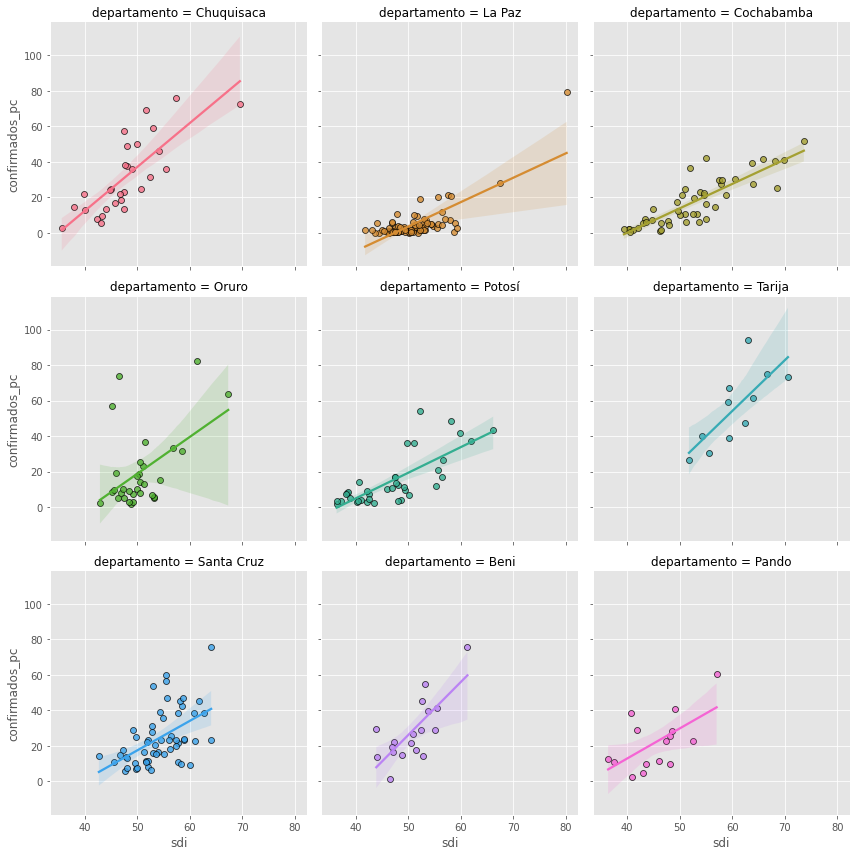

In [13]:
acum1 = acum[acum.urbanizacion>0]
sns.lmplot(x="sdi", y="confirmados_pc", hue="departamento", data=acum,
          robust=False, height=4, col="departamento", col_wrap=3,
          scatter_kws={"marker": "t", "linewidth":.8, "edgecolor":"black"}
          )
# plt.xscale("log")

(0.0, 100.0)

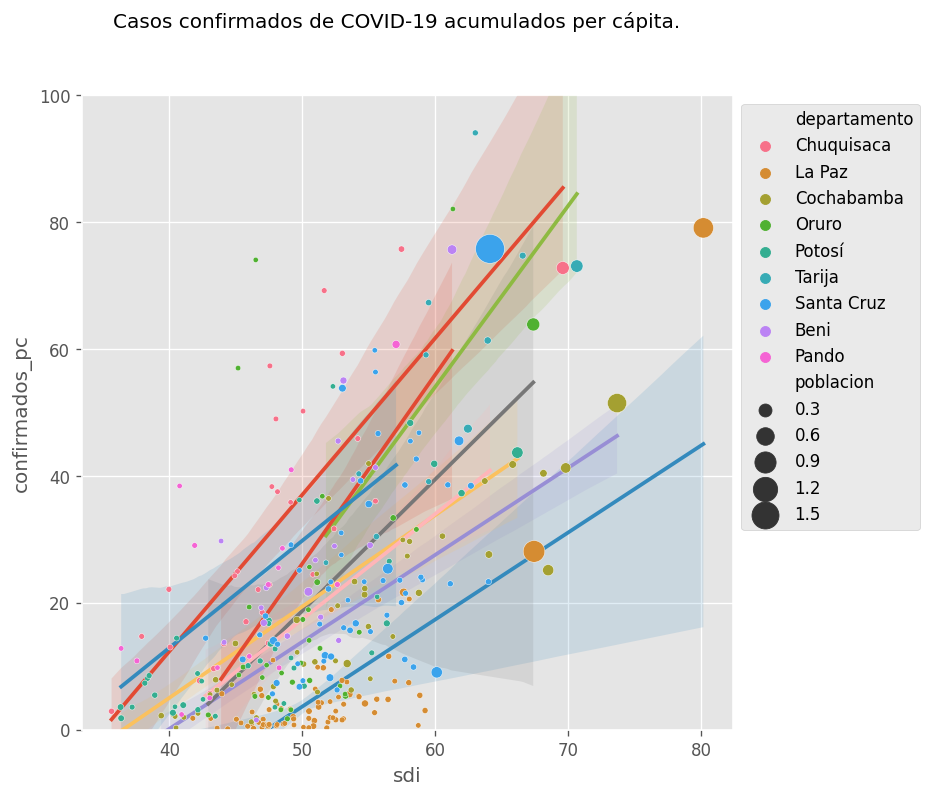

In [14]:
fig, axs = plt.subplots(1,1,figsize=(7,7), dpi=120)
fig.suptitle("Casos confirmados de COVID-19 acumulados per cápita.")
for i in acum.departamento.unique():
    sns.regplot(x="sdi", y="confirmados_pc", data=acum[acum.departamento==i], ax=axs,scatter=False,line_kws={"zorder":1})
sns.scatterplot(x="sdi", y="confirmados_pc", hue="departamento", data=acum, size="poblacion", sizes=(10, 300), ax=axs, zorder=2)
axs.legend(bbox_to_anchor = (1,1))
axs.set_ylim(0,100)

# plotly and heroku play

In [15]:
# import pandas as pd
# import plotly.express as px

# import dash
# import dash_table
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output

In [16]:
# app = dash.Dash(__name__)
# server = app.server

# df_merge

In [17]:
# df = df_merge[df_merge.cod_ine==20101]
# display(df)

# px.bar(x = df.fecha, y =df.confirmados)

In [18]:
# if __name__ == '__main__':
#     app.run_server(debug=True)